In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Programming Homework #1

**(1) head() 메소드를 사용하여 5명까지의 키와 몸무게를 출력하세요**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽어오기
df = pd.read_csv('/content/drive/MyDrive/hw_info.csv')

# 5명까지의 키와 몸무게 출력
df.head()

,Unnamed: 0,height,weight
0,1,158.9,52.015
1,2,173.6,66.910
2,3,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


**(2) matplotlib를 사용하여 데이터를 시각화해보세요**

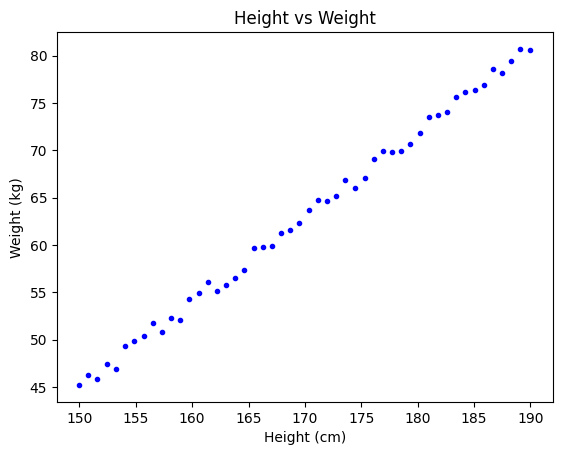

In [10]:
# 산점도 그리기
# plt.scatter(df['height'], df['weight'])
plt.plot(df['height'], df['weight'], "b.")

# 그래프 타이틀, x축 라벨, y축 라벨 지정
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

# 그래프 출력
plt.show()

**(3) 사이킷런을 사용해 선형회귀를 실해하여 키가 160cm인 사람의 몸무게를 예측하여 출력하고 절편과 기울기를 각각 출력하세요**

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# CSV 파일 읽어오기
df = pd.read_csv('/content/drive/MyDrive/hw_info.csv')

# 입력 변수 (키)
X = df[['height']].values

# 출력 변수 (몸무게)
y = df[['weight']].values

# 선형회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, y)

# 키가 160cm인 사람의 몸무게 예측
height = [[160]]
weight_pred = model.predict(height)

# 예측 결과 출력
print("키가 160cm인 사람의 몸무게 예측 결과:", weight_pred[0][0])

# 모델 파라미터 출력
print("절편:", model.intercept_[0])
print("기울기:", model.coef_[0][0])

키가 160cm인 사람의 몸무게 예측 결과: 53.96281868176203
절편: -89.97771698122781
기울기: 0.8996283478936865


**(4) matplotlib를 사용하여 예측 결과를 시각화해보세요**

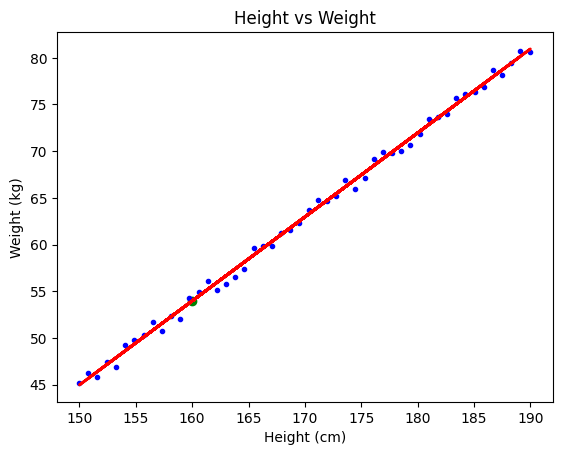

In [9]:
# 산점도 그리기
plt.plot(X, y, "b.")

# 회귀선 그리기
plt.plot(X, model.predict(X), "r-", linewidth=2, label="Predictions")

# 예측값 마커 그리기
plt.scatter(height, weight_pred, color='green')

# 그래프 타이틀, x축 라벨, y축 라벨 지정
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

# 그래프 출력
plt.show()

### Programming Homework #2

**male: 0 | female:1 변환**

In [13]:
import pandas as pd

# 데이터프레임으로 CSV 파일 읽어오기
df = pd.read_csv("/content/drive/MyDrive/people2.csv")

# 성별 열 값 치환하기 male: 0, female: 1
df["Gender"] = df["Gender"].apply(lambda x: 0 if x == "male" else 1)

# 변경된 데이터프레임 저장하기
df.to_csv("/content/drive/MyDrive/people.csv", index=False)

**(1) head() 메소드를 사용하여 5명까지의 사항을 출력하세요**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽어오기
df = pd.read_csv('/content/drive/MyDrive/people.csv')

# 5명까지의 고객아이디, 생존여부, 객실등급, 성별, 나이 출력
df.head()

,PassengerId,Survival,Class,Gender,Age
0,1,0,3,0,22.0
1,2,1,1,1,38.0
2,3,1,3,1,26.0
3,4,1,1,1,35.0
4,5,0,3,0,35.0


**(2) info() 메소드를 사용하여 데이터를 확인하세요**

In [20]:
# CSV 파일 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survival     891 non-null    int64  
 2   Class        891 non-null    int64  
 3   Gender       891 non-null    int64  
 4   Age          714 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


**(3) null cell을 갖는 Age 데이터에 대하여 fillna() 함수를 사용하여 평균값으로 채우세요**

In [21]:
import pandas as pd

# 'Age' 열에서 null 값을 평균값으로 대체
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

# 결과 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survival     891 non-null    int64  
 2   Class        891 non-null    int64  
 3   Gender       891 non-null    int64  
 4   Age          891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB
None


**(4) StandardScaler()로 scale normalization을 수행하세요**

**(5) Class, Gender, Age 데이터를 바탕으로 Survival에 대한 로지스틱 회귀를 실행하고 생존율 예측 모델을 만드세요**

**(6) 임의의 숫자를 넣어 여러명의 생존율에 대한 추정 결과와 확률을 출력하세요**

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Class, Gender, Age에 대한 feature 추출
X = df[['Class', 'Gender', 'Age']]

# Survival 정보 추출
y = df['Survival']

# 데이터 스케일링 (StandardScaler 사용)
scaler = StandardScaler(with_mean=False, with_std=False)
X_scaled = scaler.fit_transform(X)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_scaled, y)

# 생존율 예측
new_data = np.array([[1, 0, 30], [2, 1, 25]]) # [1등석, 남자, 30세],  [2등석, 여자, 25세]
new_data_scaled = scaler.transform(new_data)
prediction = model.predict_proba(new_data_scaled)[:, 1]
prediction2 = model.predict(new_data_scaled)

# 생존 확률 출력
print(prediction)

# 생존율 추정 결과 출력
print(prediction2)

[0.48751086 0.81687492]
[0 1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
